<a href="https://colab.research.google.com/github/Avaniharetlia/MLPROJECTS/blob/main/lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [ ]:
df=pd.read_csv('/content/cancer patient data sets.csv')
print(df)


     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk

In [ ]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
df.sample(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
983,983,P984,26,1,3,2,4,2,3,2,...,4,5,6,5,5,4,6,5,4,Medium
403,403,P461,44,1,1,2,3,4,2,4,...,4,1,2,4,6,5,4,2,5,Medium
279,279,P35,17,2,1,2,3,4,4,3,...,1,3,3,2,1,3,2,1,1,Low
782,782,P802,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
18,18,P114,36,1,6,7,7,7,7,7,...,8,5,7,6,7,8,7,6,2,High
671,671,P702,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
880,880,P891,37,1,8,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
26,26,P121,38,2,2,1,5,3,2,3,...,6,7,2,5,8,1,3,2,3,Medium
430,430,P486,28,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High


In [ ]:
df.shape
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
df.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [ ]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
print("no. of zero values in age",df[df['Age']==0].shape[0])

no. of zero values in age 0


In [ ]:
for column in df.columns:
    if df[column].dtype != 'object':
        zero_count = df[df[column] == 0].shape[0]
        print(f"no. of zero values in {column}: {zero_count}")

no. of zero values in index: 1
no. of zero values in Age: 0
no. of zero values in Gender: 0
no. of zero values in Air Pollution: 0
no. of zero values in Alcohol use: 0
no. of zero values in Dust Allergy: 0
no. of zero values in OccuPational Hazards: 0
no. of zero values in Genetic Risk: 0
no. of zero values in chronic Lung Disease: 0
no. of zero values in Balanced Diet: 0
no. of zero values in Obesity: 0
no. of zero values in Smoking: 0
no. of zero values in Passive Smoker: 0
no. of zero values in Chest Pain: 0
no. of zero values in Coughing of Blood: 0
no. of zero values in Fatigue: 0
no. of zero values in Weight Loss: 0
no. of zero values in Shortness of Breath: 0
no. of zero values in Wheezing: 0
no. of zero values in Swallowing Difficulty: 0
no. of zero values in Clubbing of Finger Nails: 0
no. of zero values in Frequent Cold: 0
no. of zero values in Dry Cough: 0
no. of zero values in Snoring: 0


In [ ]:
df.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(1000, 26)

Level Counts:
Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


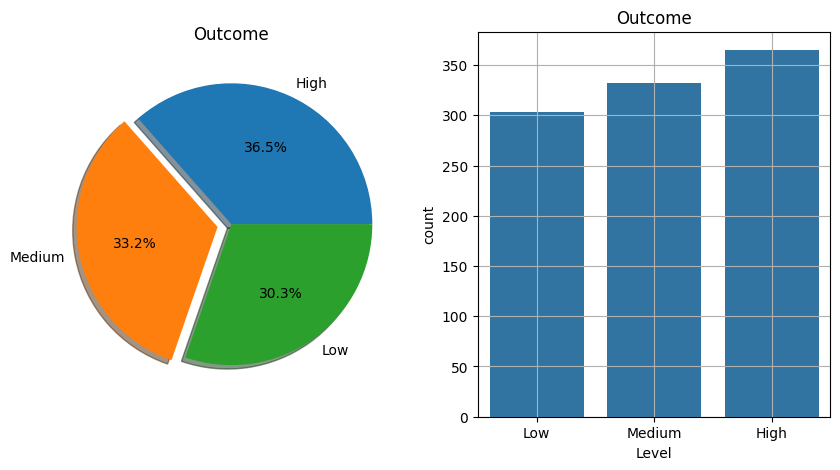

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib.pyplot

f,ax=plt.subplots(1,2,figsize=(10,5))
df['Level'].value_counts().plot.pie(explode=[0.1 if i == 1 else 0 for i in range(len(df['Level'].value_counts()))],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(data=df, x='Level', ax=ax[1])
ax[1].set_title('Outcome')
# The original code had N and P which might be confusing, using value_counts directly
level_counts = df['Level'].value_counts()
print("Level Counts:")
print(level_counts)
plt.grid()
plt.show()

array([[<Axes: xlabel='index', ylabel='index'>,
        <Axes: xlabel='Age', ylabel='index'>,
        <Axes: xlabel='Gender', ylabel='index'>,
        <Axes: xlabel='Air Pollution', ylabel='index'>,
        <Axes: xlabel='Alcohol use', ylabel='index'>,
        <Axes: xlabel='Dust Allergy', ylabel='index'>,
        <Axes: xlabel='OccuPational Hazards', ylabel='index'>,
        <Axes: xlabel='Genetic Risk', ylabel='index'>,
        <Axes: xlabel='chronic Lung Disease', ylabel='index'>,
        <Axes: xlabel='Balanced Diet', ylabel='index'>,
        <Axes: xlabel='Obesity', ylabel='index'>,
        <Axes: xlabel='Smoking', ylabel='index'>,
        <Axes: xlabel='Passive Smoker', ylabel='index'>,
        <Axes: xlabel='Chest Pain', ylabel='index'>,
        <Axes: xlabel='Coughing of Blood', ylabel='index'>,
        <Axes: xlabel='Fatigue', ylabel='index'>,
        <Axes: xlabel='Weight Loss', ylabel='index'>,
        <Axes: xlabel='Shortness of Breath', ylabel='index'>,
        <Axes: xlab

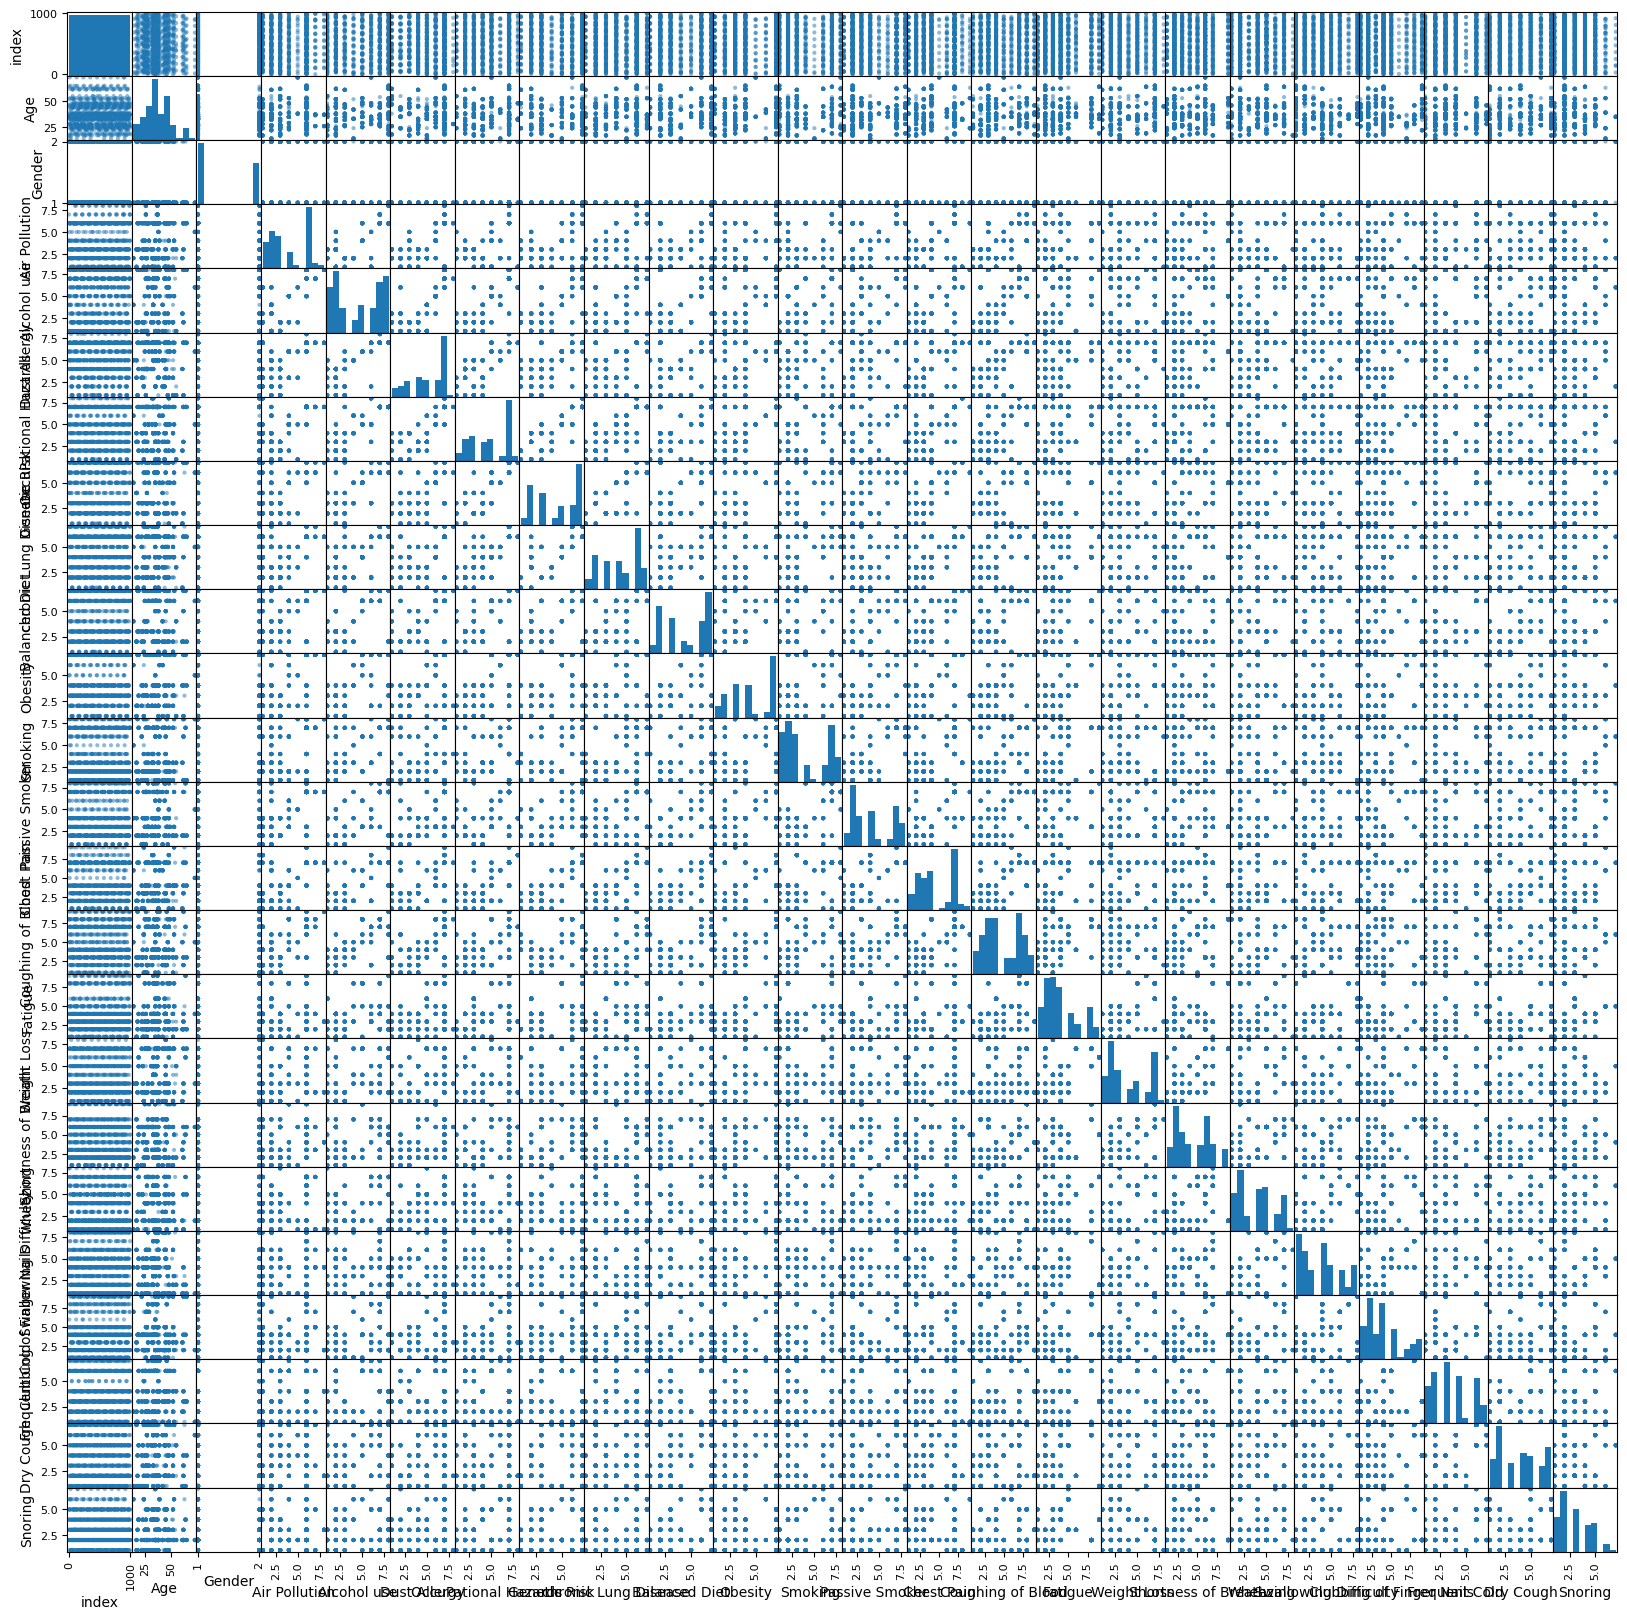

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
df = pd.read_csv('/content/cancer patient data sets.csv')


In [ ]:

df = df.drop(['index', 'Patient Id'], axis=1)

In [ ]:
label_encoder = LabelEncoder()
df['Level'] = label_encoder.fit_transform(df['Level'])

In [ ]:
X = df.drop('Level', axis=1)
y = df['Level']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transfoscaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(label_binarize(y_test, classes=[0, 1, 2]), y_pred_proba, average='macro', multi_class='ovr')


In [ ]:
print(f"Accuracy      : {accuracy:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"ROC AUC Score : {roc_auc:.4f}")

Accuracy      : 1.0000
Precision     : 1.0000
Recall        : 1.0000
F1 Score      : 1.0000
ROC AUC Score : 1.0000
